# Penggunaan API 'chinook'
## Pengantar

<i>Application Programming Interface </i> (API) ini digunakan untuk menampilkan beberapa data melalui web service. Data yang ditampilan dari database SQLLite. Berikut skema ERD database chinook.

![](res/chinookschema2.png)

**Daftar Tabel yang ada di Database Chinook:**
- `employees` menyimpan informasi pegawai
- `customers` menyimpan informasi customer (pelanggan)
- `invoices` menyimpan informasi invoice
- `invoices_items` menyimpan informasi rincian invoice
- `tracks` menyimpan informasi track lagu
- `playlists` menyimpan informasi playlist lagu
- `playlist_track` menyimpan informasi relasi antara table `tracks` dan `playlist` 
- `media_types` menyimpan informasi jenis media
- `genres` menyimpan informasi genre musik
- `albums` menyimpan informasi album lagu
- `artists` menyimpan informasi artis lagu

In [4]:
#import library yang dibutuhkan

import sqlite3
import pandas as pd
import requests

conn = sqlite3.connect("data/chinook.db")

## Daftar Method

Dalam API sederhana ini, terdapat beberapa method yang telah disediakan untuk menampilkan data dari database chinook. Beberapa method tersebut antara lain:

**Daftar Method dalam API Chinook:**
- `customers` statis
- `billingcountry` statis
- `top_customer` dinamis
- `top_billingcountry` dinamis
- `market_by_day` dinamis
- `best_genres` dinamis

### Method `customers`

- Keterangan    = Menampilkan data nama dari tabel customers
- Jenis         = Statis
- Output        = JSON
- Parameter     = TIDAK ADA

**Contoh Penggunaan**

- `http://127.0.0.1:5000/chinook/customers`

In [8]:
customer = requests.get('http://127.0.0.1:5000/chinook/customers')

list_costumer=''
if customer.status_code == 200:
     list_costumer = pd.DataFrame(customer.json()).head()
        
list_costumer        

,FirstName,LastName
0,Aaron,Mitchell
1,Alexandre,Rocha
2,Astrid,Gruber
3,Bjørn,Hansen
4,Camille,Bernard


### Method `billingcountry`

- Keterangan    = Menampilkan data billingcountry dari tabel invoices
- Jenis         = Statis
- Output        = JSON
- Parameter     = TIDAK ADA

**Contoh Penggunaan**

- `http://127.0.0.1:5000/chinook/billingcountry`

In [10]:
country = requests.get('http://127.0.0.1:5000/chinook/billingcountry')

list_country = ''
if country.status_code == 200:
     list_country=pd.DataFrame(country.json()).sort_values('Total', ascending=False).head()

list_country

,Total
USA,523.06
Canada,303.96
France,195.10
Brazil,190.10
Germany,156.48


### Method `top_customer`

- Keterangan    = Menampilkan informasi customer yang paling banyak bertransaksi
- Jenis         = Dinamis
- Output        = JSON
- Parameter   
    - `get` (integer) berupa filter angka untuk menampilkan daftar teratas sesuai angka yang dimasukkan dalam parameter tersebut  

**Contoh Penggunaan**

- `http://127.0.0.1:5000/chinook/top_customer` menampilkan seluruh customer diurutkan dari yang paling banyak transaksi
- `http://127.0.0.1:5000/chinook/top_customer?get=5` hanya menampilkan lima terbanyak

In [11]:
top_customer = requests.get('http://127.0.0.1:5000/chinook/top_customer')

list_top_customer = ''
if top_customer.status_code == 200:
     list_top_customer=pd.DataFrame(top_customer.json()).head(3)
        
list_top_customer

,FirstName,LastName,Country,Total
6,Helena,Holý,Czech Republic,49.62
26,Richard,Cunningham,USA,47.62
57,Luis,Rojas,Chile,46.62


In [13]:
top5_customer = requests.get('http://127.0.0.1:5000/chinook/top_customer?get=5')

list_top5_customer = ''
if top5_customer.status_code == 200:
     list_top5_customer = pd.DataFrame(top5_customer.json())
        
list_top5_customer

,FirstName,LastName,Country,Total
6,Helena,Holý,Czech Republic,49.62
26,Richard,Cunningham,USA,47.62
57,Luis,Rojas,Chile,46.62
46,Hugh,O'Reilly,Ireland,45.62
45,Ladislav,Kovács,Hungary,45.62


### Method `top_billingcountry`

- Keterangan    = Menampilkan informasi negara yang paling banyak transaksi
- Jenis         = Dinamis
- Output        = JSON
- Parameter   
    - `get` (integer) berupa filter angka untuk menampilkan daftar teratas sesuai angka yang dimasukkan dalam parameter tersebut 

**Contoh Penggunaan**

- `http://127.0.0.1:5000/chinook/top_billingcountry` menampilkan seluruh negara diurutkan dari yang paling banyak transaksi
- `http://127.0.0.1:5000/chinook/top_billingcountry?get=3` hanya menampilkan tiga terbanyak

In [14]:
top_billingcountry = requests.get('http://127.0.0.1:5000/chinook/top_billingcountry')

list_top_billingcountry = ''
if top_billingcountry.status_code == 200:
     list_top_billingcountry=pd.DataFrame(top_billingcountry.json()).head()

list_top_billingcountry

,Country,Total
5,USA,523.06
4,Canada,303.96
8,France,195.10
25,Brazil,190.10
1,Germany,156.48


In [19]:
top3_billingcountry = requests.get('http://127.0.0.1:5000/chinook/top_billingcountry?get=3')

list_top3_billingcountry=''
if top3_billingcountry.status_code == 200:
     list_top3_billingcountry=pd.DataFrame(top3_billingcountry.json())

list_top3_billingcountry

,Country,Total
5,USA,523.06
4,Canada,303.96
8,France,195.10


<AxesSubplot:>

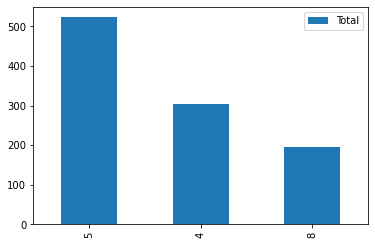

In [20]:
list_top3_billingcountry.plot.bar()

### Method `market_by_day`

- Keterangan    = Menampilkan data market berdasarkan negara dan hari
- Jenis         = Dinamis
- Output        = JSON
- Parameter   
    - `country` (string) untuk filter berdasarkan negara tertentu sesuai yang dimasukkan 
    - `day` (string) untuk filter berdasarkan hari

**Contoh Penggunaan**

- `http://127.0.0.1:5000/chinook/market_by_day` menampilkan seluruh data
- `http://127.0.0.1:5000/chinook/market_by_day?country=USA` hanya menampilkan data amerika
- `http://127.0.0.1:5000/chinook/market_by_day?day=Saturday` hanya menampilkan data hari Sabtu
- `http://127.0.0.1:5000/chinook/market_by_day?country=USA&day=Saturday` hanya menampilkan data Amerika di hari Sabtu

In [21]:
market_by_day = requests.get('http://127.0.0.1:5000/chinook/market_by_day')

list_market_by_day=''
if market_by_day.status_code == 200:
     list_market_by_day=pd.DataFrame(market_by_day.json()).head()

list_market_by_day

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Argentina,1.98,3.96,NaN,NaN,14.85,1.98,14.85
Australia,1.98,3.96,NaN,NaN,14.85,1.98,14.85
Austria,24.80,3.96,0.99,NaN,3.96,8.91,NaN
Belgium,14.85,3.96,NaN,NaN,3.96,14.85,NaN
Brazil,19.80,1.98,26.73,45.56,16.83,63.36,15.84


In [22]:
market_by_day_saturday = requests.get('http://127.0.0.1:5000/chinook/market_by_day?day=Saturday')

list_market_by_day_saturday=''
if market_by_day_saturday.status_code == 200:
     list_market_by_day_saturday=pd.DataFrame(market_by_day_saturday.json()).head()
        
list_market_by_day_saturday

,Saturday
Argentina,1.98
Australia,1.98
Austria,8.91
Belgium,14.85
Brazil,63.36


<AxesSubplot:>

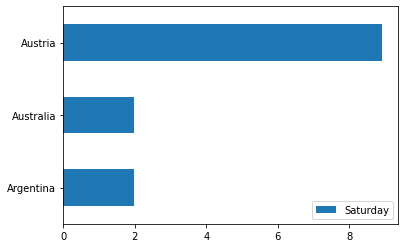

In [23]:
pd.DataFrame(market_by_day_saturday.json()).head(3).plot.barh()

### Method `best_genres`

- Keterangan    = Menampilkan informasi genres dari setiap negara yang bertransaksi
- Jenis         = Dinamis
- Output        = JSON
- Parameter   
    - `country` (string) untuk filter berdasarkan negara tertentu sesuai yang dimasukkan 
    - `year` (integer)  untuk filter berdasarkan tahun transaksi

**Contoh Penggunaan**

- `http://127.0.0.1:5000/chinook/best_genres` menampilkan seluruh data
- `http://127.0.0.1:5000/chinook/best_genres?country=Denmark` hanya menampilkan data Denmark
- `http://127.0.0.1:5000/chinook/best_genres?year=2009` hanya menampilkan data tahun 2009
- `http://127.0.0.1:5000/chinook/best_genres?country=Denmark&year=2009` hanya menampilkan data Amerika di hari Sabtu

In [27]:
best_genres2009 = requests.get('http://127.0.0.1:5000/chinook/best_genres?year=2009')

list_best_genres2009=''
if best_genres2009.status_code == 200:
     list_best_genres2009=df = pd.DataFrame(best_genres2009.json())
        
list_best_genres2009

,Country,Genre,Year
0,Germany,Rock,2009
1,Germany,Rock,2009
2,Norway,Rock,2009
3,Norway,Rock,2009
4,Norway,Rock,2009
...,...,...,...
449,USA,Rock,2009
450,USA,Rock,2009
451,USA,Latin,2009
452,USA,Latin,2009


In [28]:
list_best_genres2009.dtypes


Country    object
Genre      object
Year       object
dtype: object

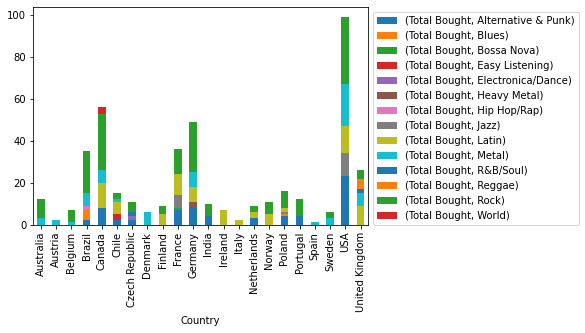

In [29]:
list_best_genres2009.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2) 

![](assets/chinookschema2.png)